<a href="https://colab.research.google.com/github/Abishethvarman/ChatGPT-Education/blob/main/ChatGPT_Education_SVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of tweets on education in ChatGPT
##  SVN for 3 classes
Neutral - 0
Positive - 1
Negative - 2


---


The data set : https://drive.google.com/file/d/1Lw3UNB5FCUQqm1Otk7EYBvpDyIHM7ALi/view?usp=drive_link

---


Orgin: https://www.kaggle.com/datasets/nutrientaxis/chatgpt-and-education-tweets-dataset?select=ChatGPT_Education_Tweets_Dataset.csv

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("stopwords")
download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [ ]:
df_data = pd.read_csv("ChatGPT_Education_Tweets_Dataset.csv")

In [ ]:
# sentiment labels to integers
df_data['sentiment'] = df_data['sentiment'].replace({'neutral': 0, 'positive': 1, 'negative': 2})

In [ ]:
# Preprocessing
def preprocess(text):
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'one', 'two', 'more'])

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() != 'mor']
    return ' '.join(filtered_words)

In [ ]:
# Apply preprocessing to the text data
df_data['clean'] = df_data['text'].apply(preprocess)

In [ ]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df_data['clean'], df_data['sentiment'], test_size=0.2)

In [ ]:
# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Choose an appropriate number of features
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [ ]:
linear_svm_model = LinearSVC(max_iter=10000)

In [ ]:

# svm_model = SVC(kernel='linear')
# svm_model.fit(x_train_vectorized, y_train)

In [ ]:
linear_svm_model.fit(x_train_vectorized, y_train)


LinearSVC(max_iter=10000)

In [ ]:
linear_svm_predictions = linear_svm_model.predict(x_test_vectorized)


In [ ]:
linear_svm_accuracy = accuracy_score(y_test, linear_svm_predictions)
print("Linear SVM Model Accuracy:", linear_svm_accuracy)

Linear SVM Model Accuracy: 0.7270976616231086


In [ ]:
linear_svm_precision = precision_score(y_test, linear_svm_predictions, average='weighted')
linear_svm_recall = recall_score(y_test, linear_svm_predictions, average='weighted')
linear_svm_f1 = f1_score(y_test, linear_svm_predictions, average='weighted')

print("Linear SVM Precision:", linear_svm_precision)
print("Linear SVM Recall:", linear_svm_recall)
print("Linear SVM F1 Score:", linear_svm_f1)

Linear SVM Precision: 0.7284611366585879
Linear SVM Recall: 0.7270976616231086
Linear SVM F1 Score: 0.720713537075289


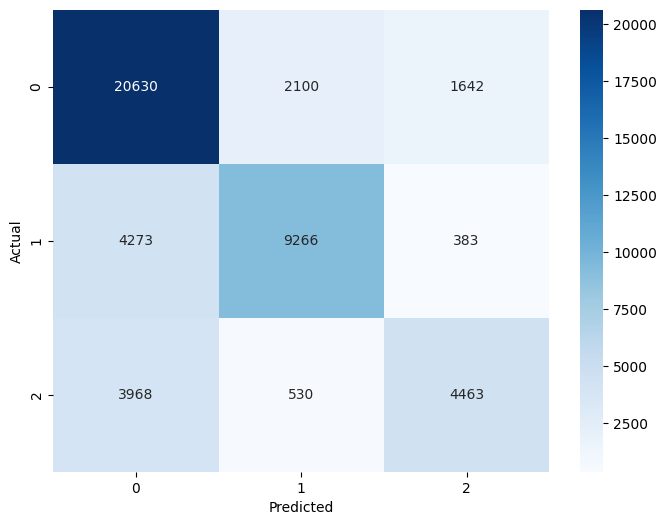

In [ ]:
linear_svm_cm = confusion_matrix(y_test, linear_svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(linear_svm_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()